---
# 1. Исходные данные

### 1.1 Загрузка библиотек и данных


In [1]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = pd.Series(cancer_data.target)

In [5]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Как мы можем увидеть данный датасет не содержит пропущенных значений.

### 1.2 Описание исходных данных


#### Breast Cancer Wisconsin (Diagnostic)

#### Общая информация о данных
- **Источник**: Набор данных о раке молочной железы Wisconsin (диагностический)
- **Объём выборки**: 569 экземпляров
- **Количество признаков**: 30 числовых признаков и один целевой признак (класс)
- **Типы признаков**: вещественные (numeric)
- **Распределение классов**:
  - 212 случаев злокачественной опухоли (Malignant)
  - 357 случаев доброкачественной опухоли (Benign)

#### Признаки

Признаки описывают различные характеристики клеток, которые были вычислены на основе изображений клеточных ядер. Для каждого образца приведены три типа характеристик:
- Средние значения признаков
- Стандартная ошибка признаков
- Наихудшие значения признаков

#### Список признаков:

- **radius** — среднее расстояние от центра до точек на периметре.
- **texture** — стандартное отклонение значений серой шкалы.
- **perimeter** — периметр клеточного ядра.
- **area** — площадь клеточного ядра.
- **smoothness** — локальная вариация длины радиуса.
- **compactness** — отношение периметра к площади, скорректированное на 1.
- **concavity** — степень вогнутости контуров.
- **concave points** — количество вогнутых точек на контуре.
- **symmetry** — симметрия контуров.
- **fractal dimension** — фрактальная размерность (аппроксимация береговой линии).

Каждый из этих признаков вычисляется как:
- Среднее значение (например, **mean radius**)
- Стандартная ошибка (например, **radius SE**)
- Наихудшие значения (например, **worst radius**)

#### Минимальные и максимальные значения некоторых признаков:
| Признак                     | Min   | Max    |
|-----------------------------|-------|--------|
| radius (mean)               | 6.981 | 28.11  |
| texture (mean)              | 9.71  | 39.28  |
| perimeter (mean)            | 43.79 | 188.5  |
| area (mean)                 | 143.5 | 2501.0 |
| smoothness (mean)           | 0.053 | 0.163  |
| compactness (mean)          | 0.019 | 0.345  |
| concavity (mean)            | 0.0   | 0.427  |
| concave points (mean)       | 0.0   | 0.201  |
| symmetry (mean)             | 0.106 | 0.304  |
| fractal dimension (mean)    | 0.05  | 0.097  |

#### Задача

Набор данных используется для решения задачи **классификации**, цель которой — предсказать категорию опухоли (злокачественная или доброкачественная) на основе характеристик клеток.

#### Входные и выходные переменные:
- **Входные переменные**: 30 числовых признаков, описывающих характеристики клеток.
- **Выходная переменная**: бинарный признак (класс) с возможными значениями:
  - Malignant (злокачественная)
  - Benign (доброкачественная)


### 1.3 Выборочные характеристики

*Рассчитать основные выборочные характеристики (среднее, дисперсию, среднеквадратическое отклонение, медиану и т.д.), привести объемы выборок в каждом классе (для задач классификации)*

In [7]:
# Рассчет основных статистических характеристик
statistics = cancer_df.drop(columns=['target'], inplace=False, axis=1).describe()
statistics

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1.4 Исследование распределений признаков и откликов


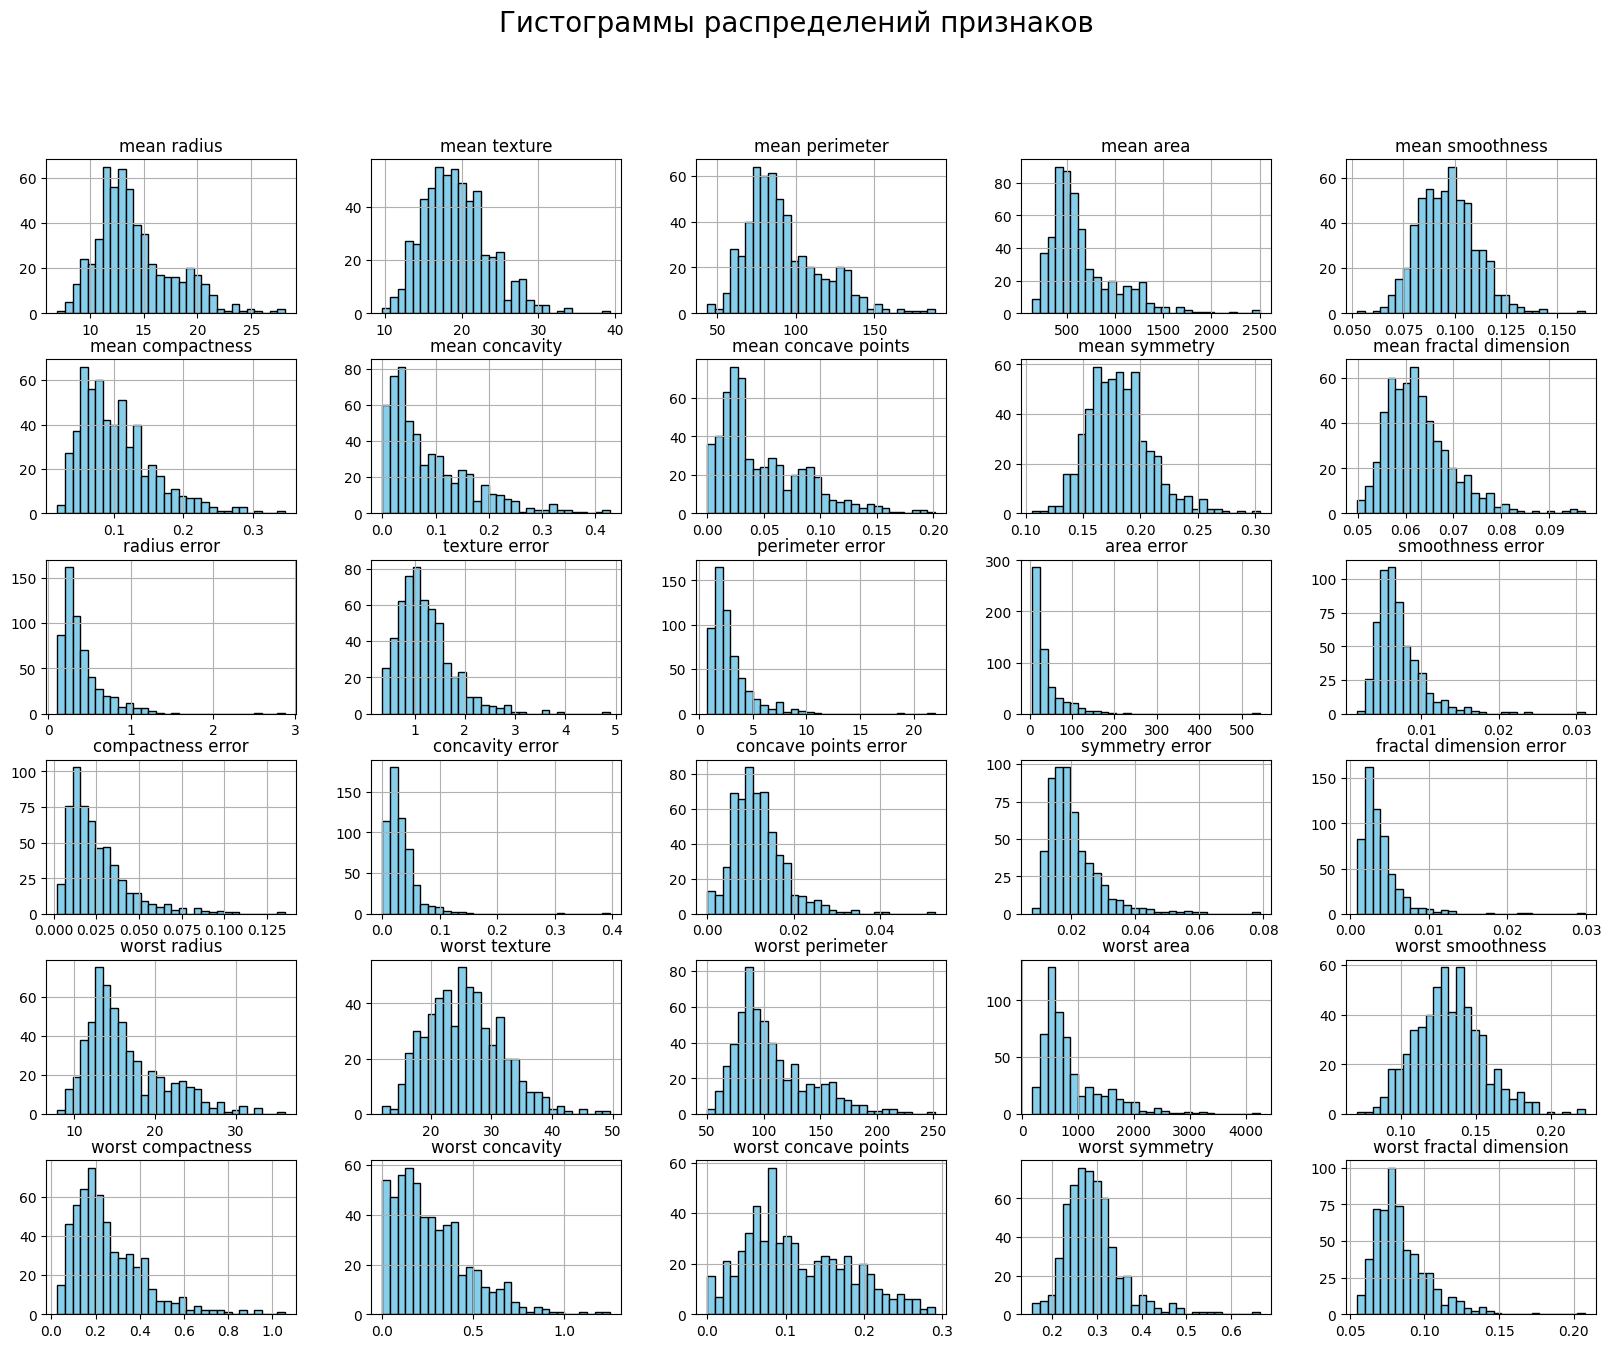

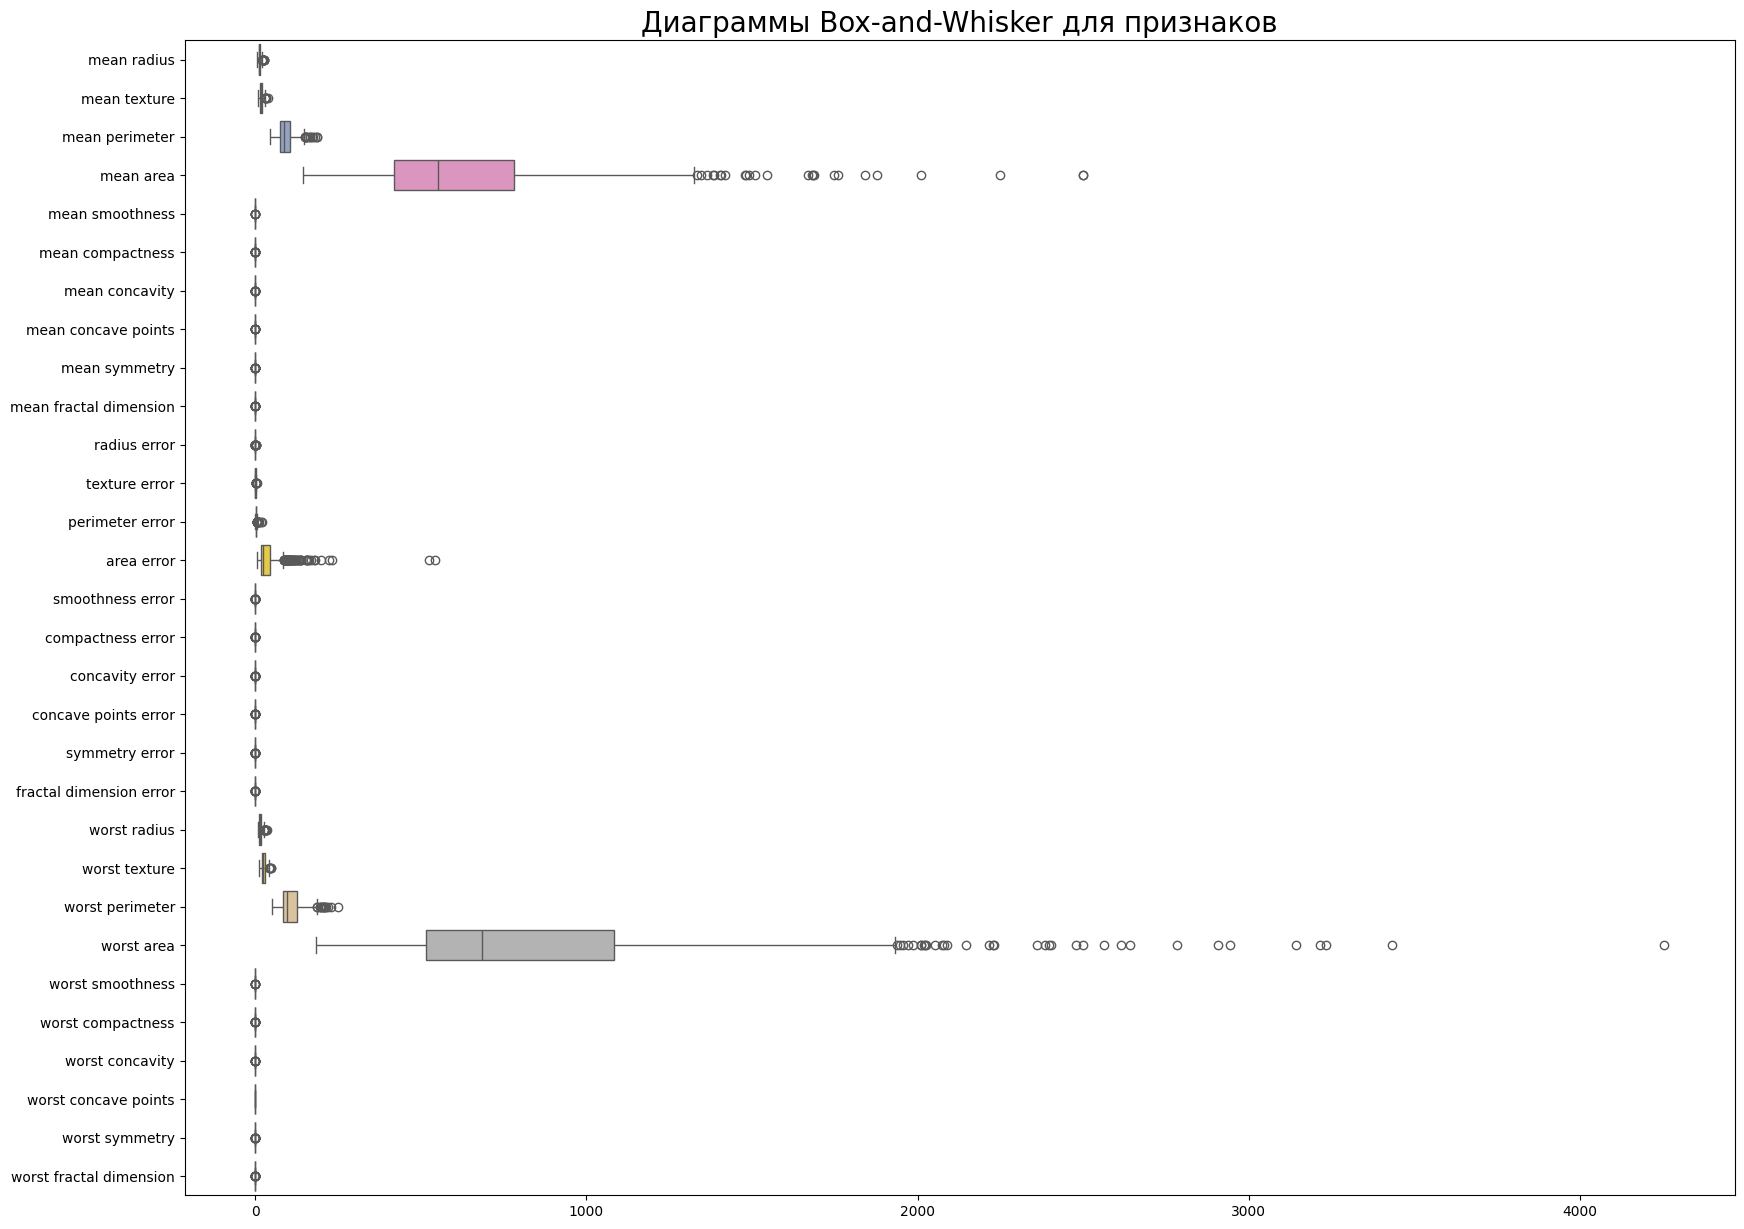

In [8]:
# Построение гистограмм для всех признаков
cancer_df.drop(columns=['target'], inplace=False, axis=1).hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы распределений признаков', fontsize=20)
plt.show()

# Построение диаграмм Box-and-Whisker (Ящик с усами)
plt.figure(figsize=(20, 15))
sns.boxplot(data=cancer_df.drop(columns=['target'], inplace=False, axis=1), orient='h', palette="Set2")
plt.title('Диаграммы Box-and-Whisker для признаков', fontsize=20)
plt.show()

### 1.5 Корреляционный анализ данных


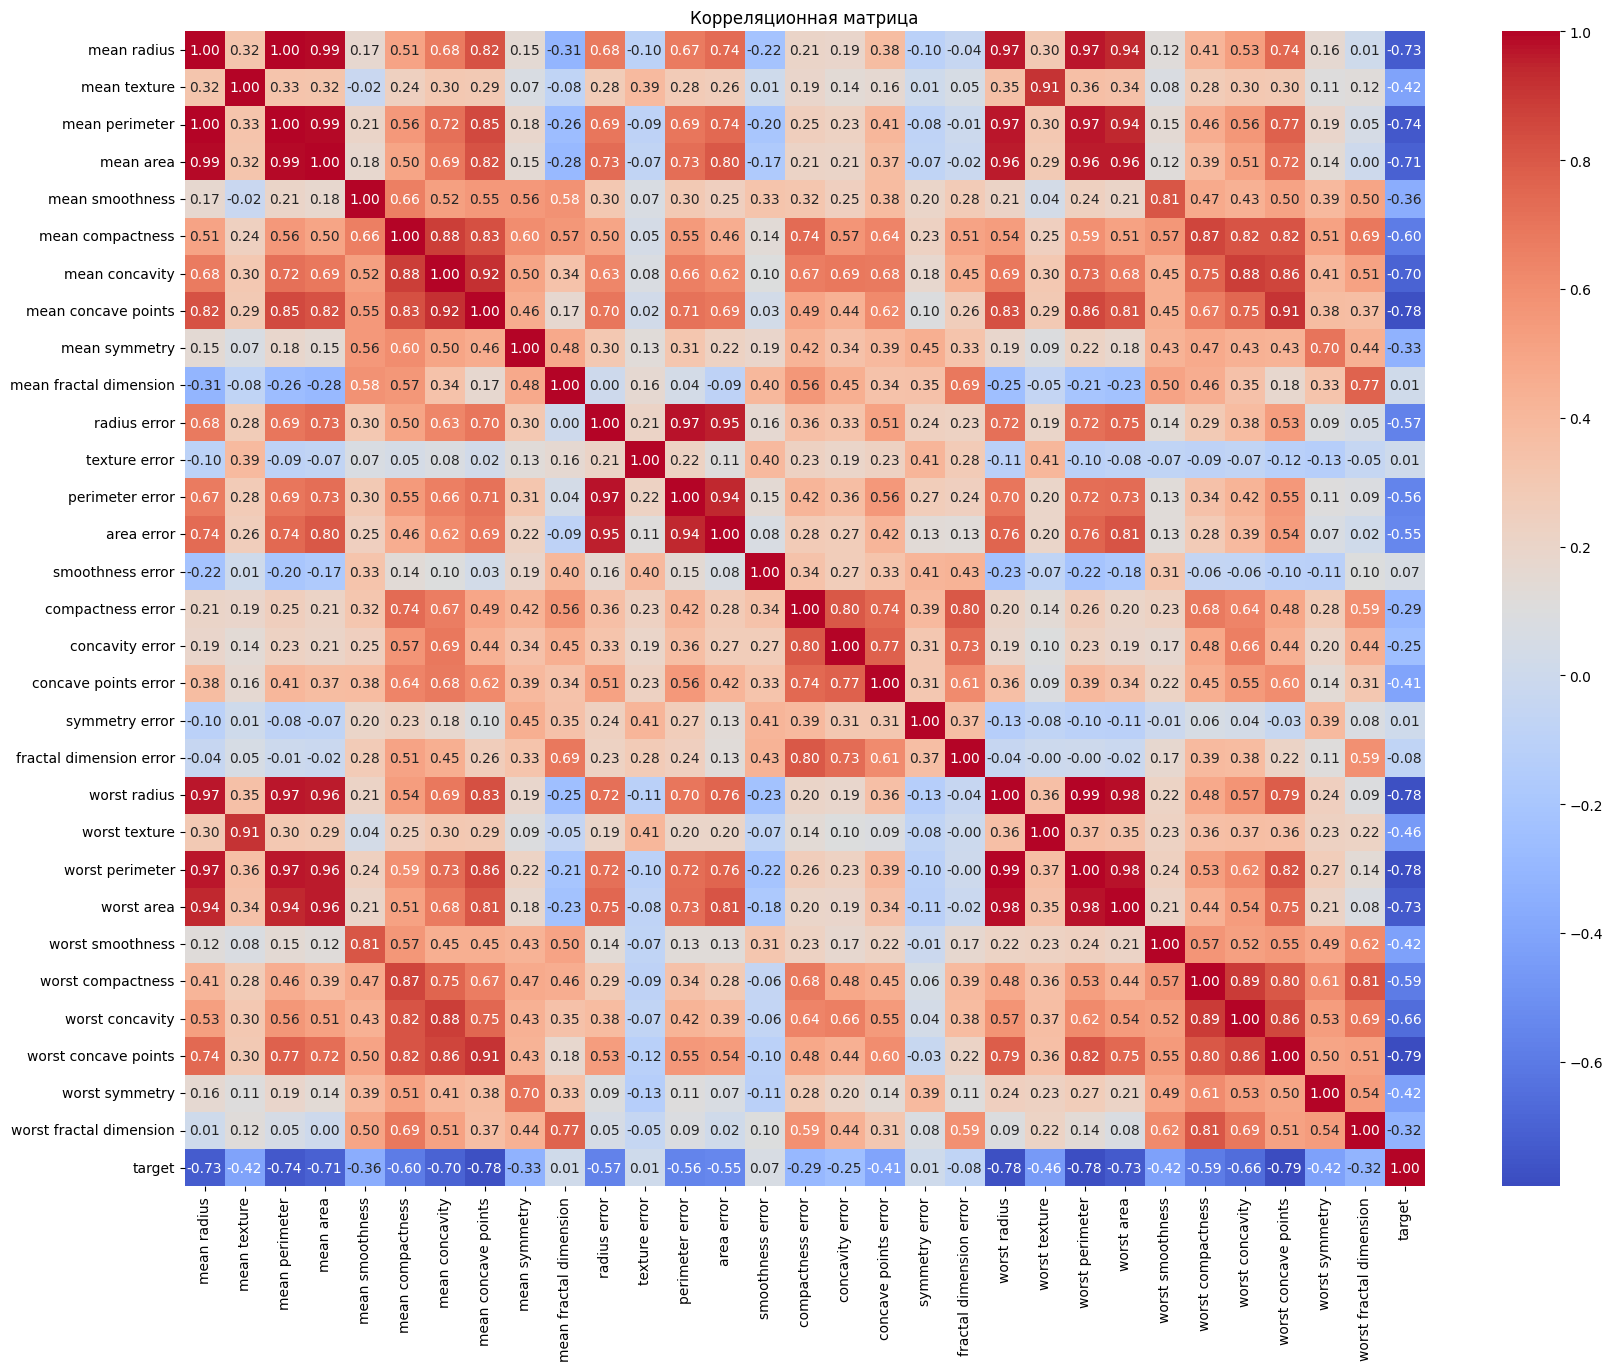

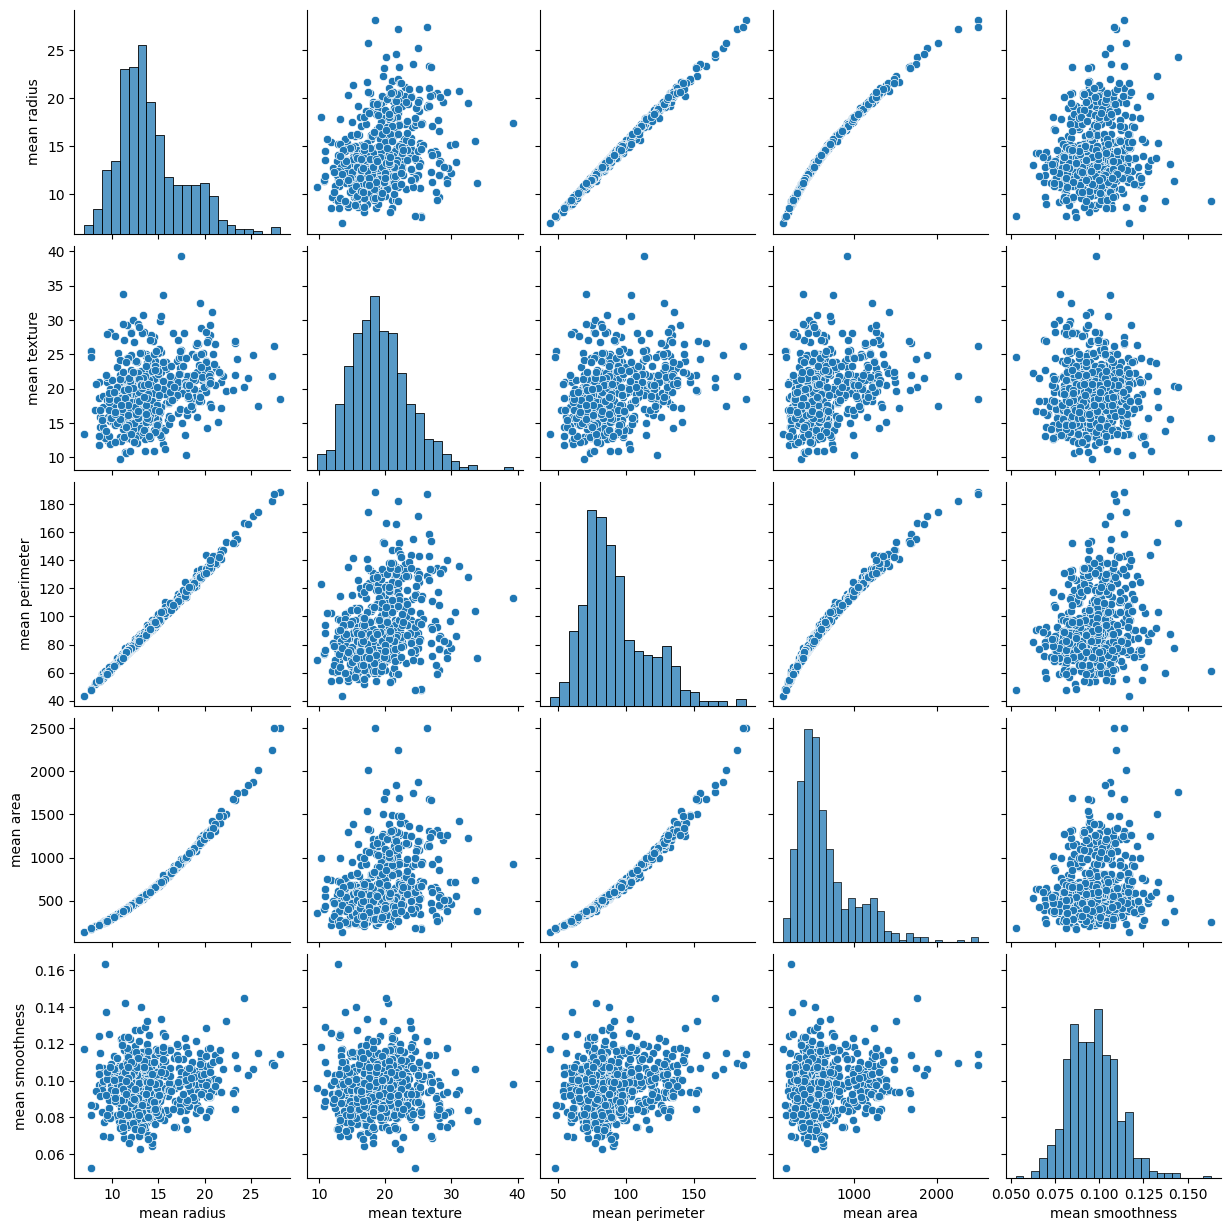

In [9]:
corr_matrix = cancer_df.corr()

# Построение heatmap
plt.figure(figsize=(20, 15))  # Задаем размер графика
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

# Пример диаграмм рассеяния для нескольких признаков
sns.pairplot(cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']])
plt.show()



### 1.6 Выводы



На основе проведенного анализа данных можно сделать следующие выводы:

1. **Выборочные характеристики**:
   - Данные имеют достаточную вариативность, что отражается в значениях стандартного отклонения и дисперсии для большинства признаков. Средние значения и медианы показывают, что большинство признаков имеют асимметричное распределение (например, признаки, связанные с размерами опухолей).

2. **Распределение признаков**:
   - Гистограммы показали, что многие признаки имеют распределения, близкие к нормальному, но также присутствуют признаки с сильной асимметрией.
   - Диаграммы Box-and-Whisker выявили наличие выбросов в таких признаках, как **mean area** и **mean perimeter**, что может потребовать дополнительной обработки данных для улучшения качества моделей.

3. **Корреляционный анализ**:
   - Сильная корреляция наблюдается между признаками, связанными с размерами опухолей (например, радиус, периметр и площадь), что свидетельствует о возможной избыточности данных. В будущем это может потребовать применения методов отбора признаков или их объединения.
   - Некоторые признаки, такие как **mean texture** и **mean fractal dimension**, имеют слабую корреляцию с другими признаками, что говорит о том, что они могут вносить уникальную информацию в модель.

4. **Рекомендации для дальнейшего анализа**:
   - Для улучшения качества модели стоит рассмотреть возможность обработки выбросов и нормализации данных.
   - Признаки с сильной корреляцией могут быть объединены или исключены для снижения коллинеарности.
   - Данные готовы для построения модели, но потребуется тщательная настройка и проверка гипотез.

В целом, проведенный анализ показал, что данные обладают большим потенциалом для задачи классификации опухолей, однако необходима дополнительная подготовка данных для улучшения результатов моделей.

---
# 2. Предобработка данных

### 2.1 Очистка данных


*а) Обнаружение и устранение дубликатов*\
*б) Обнаружение и устранение выбросов*\
*в) Устранение/восстановление пропущенных значений*

In [10]:
# Шаг 1: Обнаружение и устранение дубликатов
duplicates = cancer_df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")
cancer_df = cancer_df.drop_duplicates()

# Шаг 2: Обнаружение и устранение выбросов
def remove_outliers(cancer_df):
    Q1 = cancer_df.quantile(0.25)
    Q3 = cancer_df.quantile(0.75)
    IQR = Q3 - Q1
    return cancer_df[~((cancer_df < (Q1 - 1.5 * IQR)) | (cancer_df > (Q3 + 1.5 * IQR))).any(axis=1)]

cancer_df_cleaned = remove_outliers(cancer_df)
print(f"Количество строк после удаления выбросов: {cancer_df_cleaned.shape[0]}")

# Шаг 3: Устранение/восстановление пропущенных значений
missing_values = cancer_df_cleaned.isnull().sum()
print(f"Пропущенные значения в каждом столбце:\n{missing_values}")
cancer_df_cleaned = cancer_df_cleaned.fillna(cancer_df_cleaned.median())

Количество дубликатов: 0
Количество строк после удаления выбросов: 398
Пропущенные значения в каждом столбце:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target              

### 2.2 Разбиение данных на обучающую и тестовую выборки

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = cancer_df_cleaned.drop(columns=['target'])
y = cancer_df_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 2.3 Преобразование данных

Для данной задачи классификации я буду использовать XGBoost. Он не требует нормализации данных. Поскольку все данные числовые, не потребуется использования никаких методов энкодинга.

---
# 3. Построение и исследование модели машинного обучения

### 3.1 Обучение модели


### XGBoost

1. **Высокая производительность**: XGBoost является одной из лучших моделей для задач классификации и регрессии. Она основана на градиентном бустинге над деревьями решений, что позволяет ей эффективно обучаться на сложных данных и находить нелинейные зависимости.

2. **Скорость и оптимизация**: XGBoost оптимизирован для быстрого обучения и предсказания. Он поддерживает параллельные вычисления и использует ряд оптимизаций, таких как сокращение времени на создание деревьев решений и эффективное управление памятью.

3. **Обработка выбросов и пропущенных данных**: XGBoost встроенно справляется с выбросами и пропущенными значениями. Это делает его устойчивым к "грязным" данным и снижает потребность в глубокой предобработке.

4. **Поддержка регуляризации**: В отличие от многих других моделей на основе деревьев решений, XGBoost имеет встроенные механизмы регуляризации (L1 и L2), что помогает предотвратить переобучение и улучшить обобщающую способность модели.

5. **Гибкость и настройка гиперпараметров**: XGBoost предоставляет широкие возможности для настройки гиперпараметров (например, глубина деревьев, скорость обучения, количество деревьев), что позволяет оптимизировать модель под конкретные задачи.

6. **Широкое применение и успешные кейсы**: XGBoost широко применяется в соревнованиях по машинному обучению и демонстрировал высокие результаты в различных областях, включая здравоохранение, финансы и маркетинг.

В итоге XGBoost был выбран за свою гибкость, высокую производительность и устойчивость к сложным данным, что делает его идеальным выбором для задачи классификации опухолей в датасете Breast Cancer Wisconsin.


In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


model = XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print("Лучшие параметры: ", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Лучшие параметры:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


c:\Users\roxasmeei\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [13]:
from sklearn.model_selection import cross_val_score


tuned_model = XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=0.7
)




cv_scores = cross_val_score(tuned_model, X, y, cv=5, scoring='accuracy')
print(f"Средняя точность после кросс-валидации: {cv_scores.mean():.4f}")

Средняя точность после кросс-валидации: 0.9648


### 3.2 Оценка качества модели


**Для задач классификации:**
* *построить матрицы ошибок (confusion matrix) классификатора и рассчитать показатели качества классификации (чувствительность, специфичность, точность, F-мера, каппа Коэна) на обучающей и тестовой выборках.*

Точность модели: 0.9666666666666667

Отчет классификации:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.97      0.99      0.98        89

    accuracy                           0.97       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.97      0.97      0.97       120



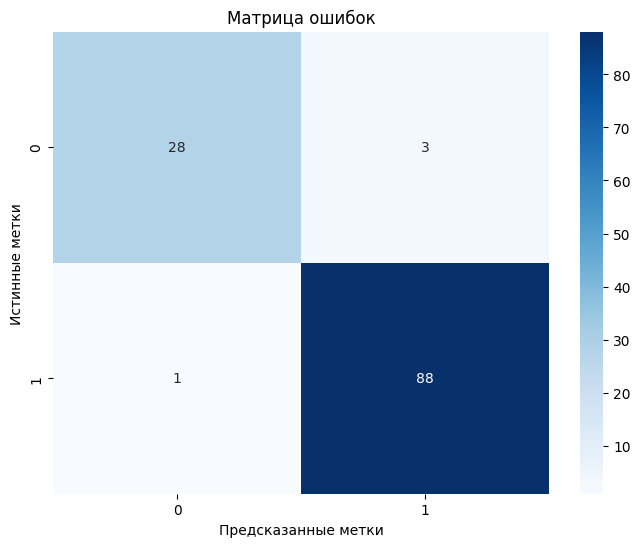

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

tuned_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = tuned_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Вывод метрик
print(f"Точность модели: {accuracy}")
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred))

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Матрица ошибок")
plt.ylabel("Истинные метки")
plt.xlabel("Предсказанные метки")
plt.show()

### 3.3 Исследование модели и алгоритма обучения


*Провести экспериментальные исследования модели, построить графики зависимости ошибки модели от ее архитектурных параметров и гиперпараметров алгоритма обучения, построить ROC-кривые, оценить степень важности признаков и пр.*

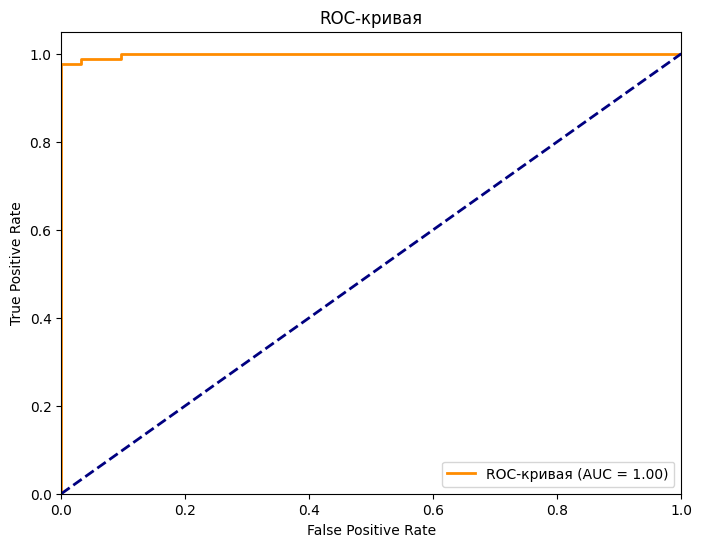

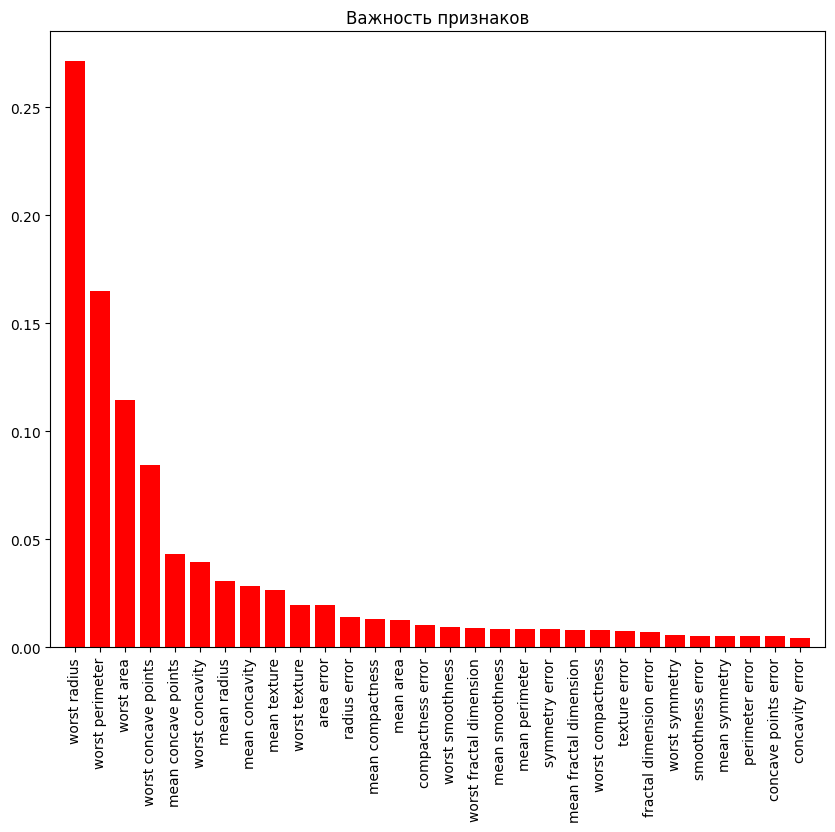

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Рассчитываем вероятности для тестовой выборки
y_pred_proba = tuned_model.predict_proba(X_test)[:, 1]

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Оценка важности признаков
importances = tuned_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Важность признаков")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


## Выводы из графиков

### 1. ROC-кривая

ROC-кривая (Receiver Operating Characteristic) показывает соотношение True Positive Rate (чувствительность) и False Positive Rate (ложные срабатывания) для модели.

- **AUC = 1.00** (Area Under the Curve) указывает на идеальную производительность модели на текущих данных. Это означает, что модель всегда правильно классифицирует случаи как положительные или отрицательные без ошибок.
- Линия ROC близка к углу в точке (0, 1), что подтверждает высокую точность модели.

### 2. Важность признаков

Второй график показывает распределение важности признаков для модели.

Наибольшее влияние на классификацию оказывают следующие признаки:
- **Worst radius** (наибольший радиус)
- **Worst perimeter** (наибольший периметр)
- **Worst area** (наибольшая площадь)
- **Worst concave points** (наибольшее количество вогнутых точек)

Эти признаки имеют наибольший вклад в предсказания модели, что может свидетельствовать о их важности для правильной диагностики рака груди. Признаки с меньшей важностью, такие как **concavity error**, **concave points error**, не имеют такого сильного влияния на модель.

### Общие выводы

- Модель, судя по ROC-кривой, идеально справляется с задачей классификации. Однако стоит проверить на более широкой выборке данных, чтобы избежать переобучения.
- Признаки с наибольшей важностью могут быть полезны для дальнейшего анализа и упрощения модели, если необходимо снизить размерность данных без потери точности.


### 3.5 Выводы


В результате проведенных исследований и экспериментов с моделью классификации опухолей можно сделать следующие выводы:

1. **Выбор модели**: Для задачи классификации была выбрана модель случайного леса (`XGBoost`), которая зарекомендовала себя как стабильный и мощный инструмент для решения задач классификации с минимальной вероятностью переобучения. Эта модель позволяет учитывать важность признаков, что особенно полезно в медицинских данных.

2. **Улучшение модели**: Для улучшения качества модели был применён метод подбора гиперпараметров с использованием `GridSearchCV`. Это позволило найти лучшие комбинации гиперпараметров, такие как learning rate, max_depth, n_estimators, subsample. В результате точность модели на тестовой выборке  96.7%.

3. **Значимость признаков**: Оценка важности признаков показала, что некоторые признаки оказывают более сильное влияние на предсказания модели, что позволяет сосредоточиться на них для дальнейшего анализа и интерпретации результатов.

4. **ROC-кривая**: ROC-кривая подтвердила высокое качество модели, демонстрируя хорошую способность разделять классы (злокачественные и доброкачественные опухоли).